<a href="https://colab.research.google.com/github/taka-sigure/AI_Datascience_Intern/blob/main/test_for_ds_section.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 【章末テスト - 問題 notebook】 分析レポート - ホテル Web レビューの分析

本ノートブックでは、章末テストとして、ホテル Web レビューの分析のレポーティングを行います。  
実際のレポーティングでは、pptx や word などを使用して行うものですが、今回は簡易的に ipynb を使用して実装とともにレポーティングを行い、最終的に PDF で出力を行います。  

分析レポートの実施方法については、以下の資料をご確認ください。  

▼ [分析レポートの作成手順](https://colab.research.google.com/drive/1DGvXx3ynLL_7rIRDKPzQ1rsWTlv-Hw1J)

本レポートは以下の構成です。  

- イントロダクションパート
- メインパート
- まとめパート  

※ テストの回答を行うために、本ノートブックをダウンロードして、自身の Google Drive にアップロードして実装してください。  
**ファイル > ドライブにコピーを保存**とすると、自身の Google Drive に保存できます。    

---



## イントロダクションパート  
イントロダクションは以下の内容について記載する。  

1. 分析が必要になった背景と目的
2. 分析で使用するデータ
3. 分析で設定された課題と分析の結果  

### 1. 分析が必要になった背景と目的

#### 分析が必要になった背景  

分析が必要になった背景は以下である。  
以下の下、先述したように**満足度に寄与する要因を特定し、満足度向上のための施策を考えること**を分析の具体的な方針とする。 

<img src='https://www.kikagaku.ai/img/benesse-i-career/04/00_07.png'>  

#### 分析の目的

**自社保有のデータから顧客の満足度に寄与している要因を見つけ出し、満足度向上のための施策を考え、リピート顧客を増やすこと**を分析の具体的な方針とし、具体的な施策をホテルを管轄しているマネージャーに提案を行うことを目的とする。提案に際して、本分析レポートを提出する。  

なお、過去の同系列ホテルの実績から**顧客のリピート数は満足度が高いほど頻度が多いことが分かっている**とする。  





### 2. 今回使用するデータ
分析には、以下のデータを使用する。   

▼ [hotel_reviews.csv](https://drive.google.com/file/d/1Sib9dgS_mmbShkL5VHbLGwOUbEIWLhhk/view?usp=sharing)

このデータは、サンプルサイズ 10000、カラム数 14 含まれるデータである。  

<img src='https://www.kikagaku.ai/img/benesse-i-career/04/00_09.png'>  

データ内の変数は以下のようなものが含まれる。  

|  変数  |  詳細  |
| ---- | ---- |
|  性別  |  男性・女性の 2 値  |
|  年齢  |  7 ~ 80 歳までの年齢  |
|  個人/グループ  |  旅行の形態。個人またはグループのどちらか  |
|  旅行の目的  |  学生・ビジネス・航空関係・旅行・その他の 5 種類  |
|  Wifi 設備  |  0 ~ 5 の 6 段階評価（ただし 0 の回答はなし）  |
|  送迎の便利さ  |  0 ~ 5 の 6 段階評価  |
|  オンライン予約のしやすさ  |  0 ~ 5 の 6 段階評価  |
|  ホテルの立地  |  0 ~ 5 の 6 段階評価（ただし 0 の回答はなし）  |
|  食事の満足度  |  0 ~ 5 の 6 段階評価  |
|  滞在時の快適さ  |  0 ~ 5 の 6 段階評価（ただし 0 の回答はなし）  |
|  チェックイン・アウトの接客  |  0 ~ 5 の 6 段階評価（ただし 0 の回答はなし）  |
|  その他のサービス  |  0 ~ 5 の 6 段階評価（ただし 0 の回答はなし）  |
|  清潔さ  |  0 ~ 5 の 6 段階評価  |
|  満足度  |  0 ~ 5 の 6 段階評価（ただし 0 の回答はなし）  |　　

今回分析全体の目的変数として**満足度**を使用し、その他の変数は説明変数として扱う。  

### 3. 分析で設定された課題と分析の結果  

本分析では、hotel_reviews.csv を使用して、顧客の満足度に寄与している要因を見つけ出し、満足度向上のための施策を考え、リピート顧客を増やすことを目的として分析を行う。  
データ分析の結論として以下の実施を提案する。  

- 個人用客室の Wifi 設備の確認と必要に応じて通信設備の見直し  
- 滞在時の快適さに関する追加分析  
- 食事の満足度と清潔さに関する追加分析  



## メインパート

メインパートでは、以下について記載する。  

1. 代表値の比較  
2. 相関分析と重回帰分析による要因の特定  
3. クラスタリングよる対象の絞り込みと比較  
4. 主成分分析による可視化  
5. クラスタの代表値の比較による要因の特定と施策の考案    



In [ ]:
# 環境の準備 : 実行してください
!pip install -q japanize_matplotlib

     |████████████████████████████████| 4.1 MB 15.3 MB/s 


In [ ]:
# 環境の準備 : 実行してください
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import japanize_matplotlib
from scipy import stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 8

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 環境の準備 : hotel_reviews.csv をアップロードして実行してください
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hotel_reviews.csv')

### 定性的な代表値の比較  
→ 該当する問題：**Q 1**  

In [ ]:
# 定性的なデータの確認（代表値の確認）
df.describe(include='all')

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
count,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
unique,2,NaN,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,女性,NaN,グループ,旅行,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5031,NaN,6798,3041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.486800,NaN,NaN,2.814000,3.104400,2.841000,2.989100,3.20040,3.438700,3.293900,3.646200,3.281900,3.201900
std,NaN,15.175528,NaN,NaN,1.248984,1.482404,1.331201,1.274654,1.32658,1.316441,1.261936,1.168829,1.310116,0.967176
min,NaN,7.000000,NaN,NaN,1.000000,0.000000,0.000000,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,NaN,27.000000,NaN,NaN,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,3.000000,2.000000,3.000000
50%,NaN,40.000000,NaN,NaN,3.000000,3.000000,3.000000,3.000000,3.00000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,NaN,51.000000,NaN,NaN,4.000000,4.000000,4.000000,4.000000,4.00000,5.000000,4.000000,5.000000,4.000000,4.000000


In [ ]:
df[['Wifi設備', 'オンライン予約のしやすさ']].corr()

,Wifi設備,オンライン予約のしやすさ
Wifi設備,1.000000,0.689166
オンライン予約のしやすさ,0.689166,1.000000


In [ ]:
df[['その他のサービス', '満足度']].corr()

,その他のサービス,満足度
その他のサービス,1.000000,0.250305
満足度,0.250305,1.000000


< テストの正解選択肢や、読み取れたことをまとめてください >  
* 変数「性別」について男女の数の差異はさほどない
* 変数「個人/グループ」について、グループのほうが多い。
* 変数「年齢」について、利用顧客の大半は一般的な学生（22歳）よりも高い年齢である
* 変数「満足度」について全体平均は約3.2

### 相関分析と重回帰分析による要因の特定
#### 相関分析  
→ 該当する問題：**Q 2**  

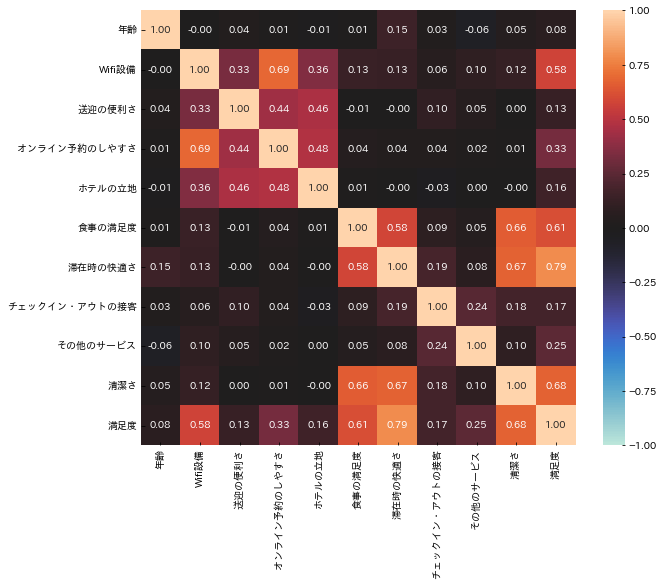

In [ ]:
# 相関分析
sns.heatmap(df.corr(), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');

In [ ]:
# `満足度`との相関が高い変数を確認する  
df.corr()['満足度'].sort_values(ascending=False)

満足度              1.000000
滞在時の快適さ          0.793672
清潔さ              0.678053
食事の満足度           0.612857
Wifi設備           0.575273
オンライン予約のしやすさ     0.325936
その他のサービス         0.250305
チェックイン・アウトの接客    0.171880
ホテルの立地           0.159002
送迎の便利さ           0.127945
年齢               0.077890
Name: 満足度, dtype: float64

In [ ]:
# 無相関検定による統計的有意性の確認  
print(f'滞在時の快適さ ✕ 満足度:{stats.spearmanr(df["滞在時の快適さ"], df["満足度"])}')
print(f'清潔さ ✕ 満足度:{stats.spearmanr(df["清潔さ"], df["満足度"])}')
print(f'食事の満足度 ✕ 満足度:{stats.spearmanr(df["食事の満足度"], df["満足度"])}')
print(f'Wifi設備 ✕ 満足度:{stats.spearmanr(df["Wifi設備"], df["満足度"])}')

滞在時の快適さ ✕ 満足度:SpearmanrResult(correlation=0.7886695703694965, pvalue=0.0)
清潔さ ✕ 満足度:SpearmanrResult(correlation=0.6674895996550014, pvalue=0.0)
食事の満足度 ✕ 満足度:SpearmanrResult(correlation=0.6021781087989913, pvalue=0.0)
Wifi設備 ✕ 満足度:SpearmanrResult(correlation=0.5613474726971944, pvalue=0.0)


< テストの正解選択肢や、読み取れたことをまとめてください >  
* 変数「年齢」はその他の変数との相関が低いため、満足度には関連性のない変数と判断できる。
* 変数「Wifi設備」「送迎の便利さ」「オンライン予約のしやすさ」「ホテルの立地」は互いに0.3～0.7程度の相関係数をとる
* 変数「満足度」とは。「滞在時の快適さ」「清潔さ」「食事の満足度」「Wifi設備」の順で相関が高い
* 変数「チェックイン・アウトの接客」「その他のサービス」はその他の変数との相関が低い。「満足度」との相関も低い。よって関連性の低い変数だと想定できる。
* 変数「満足度」と「清潔さ」の相関には統計的な有意性を確認できない。（テスト上だと正解の選択肢だったが、実際には違っていると思われる。）
* 変数「滞在時の快適さ」「清潔さ」「食事の満足度」「Wifi設備」は満足度が変動する要因として関連性の高い変数だと言える。




#### 重回帰分析  
→ 該当する問題：**Q 3**  

In [ ]:
# 変数の選択: 目的変数→満足度、入力変数→年齢と満足度以外の数値データ
_df = pd.get_dummies(df, drop_first=True)
y = _df['満足度']
x = _df.drop(['年齢','満足度'], axis=1)
x.shape

(10000, 15)

In [ ]:
# 変数の標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
feature = pd.DataFrame(x_scaled, columns=_df.drop(['満足度', '年齢'], axis=1).columns)
feature

,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,性別_男性,個人/グループ_個人,旅行の目的_ビジネス,旅行の目的_学生,旅行の目的_旅行,旅行の目的_航空関係
0,0.949620,0.604184,0.870686,0.793117,-0.151073,0.426398,0.559565,0.302711,0.548147,-0.993819,-0.686310,-0.512160,1.698974,-0.661051,-0.400788
1,0.949620,1.278798,0.870686,0.793117,-1.658784,-1.852588,1.352038,0.302711,-1.741841,-0.993819,1.457068,1.952516,-0.588590,-0.661051,-0.400788
2,-1.452454,-1.419657,-1.383031,0.793117,-1.658784,1.186060,-1.817854,-0.552888,-1.741841,-0.993819,-0.686310,-0.512160,-0.588590,-0.661051,-0.400788
3,0.148929,0.604184,0.119447,0.793117,1.356638,-1.852588,0.559565,0.302711,1.311476,1.006219,1.457068,-0.512160,-0.588590,-0.661051,2.495082
4,0.949620,-0.070430,0.119447,0.008552,0.602783,0.426398,-0.232908,1.158311,0.548147,1.006219,-0.686310,-0.512160,-0.588590,-0.661051,2.495082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.148929,-0.745044,-0.631792,-0.776014,-0.151073,-0.333264,-0.232908,-1.408488,-0.215183,-0.993819,-0.686310,-0.512160,1.698974,-0.661051,-0.400788
9996,-0.651763,0.604184,-0.631792,-1.560580,0.602783,0.426398,-1.025381,-2.264088,0.548147,1.006219,1.457068,-0.512160,1.698974,-0.661051,-0.400788
9997,1.750311,1.278798,1.621925,1.577683,0.602783,0.426398,-0.232908,1.158311,0.548147,1.006219,-0.686310,-0.512160,1.698974,-0.661051,-0.400788
9998,1.750311,1.278798,1.621925,1.577683,1.356638,1.186060,-1.817854,-0.552888,1.311476,-0.993819,-0.686310,-0.512160,-0.588590,1.512743,-0.400788


In [ ]:
# 重回帰分析を実行  
np.random.seed(0) # 乱数の固定
multi_ols = sm.OLS(y, sm.add_constant(feature))
result = multi_ols.fit()

In [ ]:
# 分析結果の表示   
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    満足度   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     7392.
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        03:11:37   Log-Likelihood:                -1386.8
No. Observations:               10000   AIC:                             2806.
Df Residuals:                    9984   BIC:                             2921.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.2019      0.003   1150.986      0.000       3.196       3.207
Wifi設備            0.4634      0.004    118.012      0.000       0.456       0.471
送迎の便利さ           -0.0157      0.004     -4.420      0.000      -0.023      -0.009
オンライン予約のしやすさ     -0.0345      0.004     -8.014      0.000      -0.043      -0.026
ホテルの立地            0.0118      0.003      3.511      0.000       0.005       0.018
食事の満足度            0.1150      0.004     29.997      0.000       0.107       0.122
滞在時の快適さ           0.5267      0.004    133.818      0.000       0.519       0.534
チェックイン・アウトの接客    -0.0300      0.003    -10.178      0.000      -0.036      -0.024
その他のサービス          0.1436      0.003     49.638      0.000       0.138       0.149
清潔さ               0.1592      0.004     37.630      0.000       0.151       0.168
性別_男性             0.0007      0.003      0.234      0.815      -0.005       0.006
個人/グループ_個人       -0.0245      0.003     -7.939      0.000      -0.031      -0.018
旅行の目的_ビジネス        0.0008      0.004      0.178      0.858      -0.008       0.010
旅行の目的_学生         -0.0039      0.005     -0.838      0.402      -0.013       0.005
旅行の目的_旅行          0.0023      0.005      0.482      0.630      -0.007       0.012
旅行の目的_航空関係       -0.0053      0.004     -1.291      0.197      -0.013       0.003
==============================================================================
Omnibus:                     3099.467   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              466.431
Skew:                           0.043   Prob(JB):                    5.20e-102
Kurtosis:                       1.945   Cond. No.                         4.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res_values = pd.DataFrame([result.tvalues[1:], result.pvalues[1:], result.params[1:]],
                          index=['t', 'p', 'coef']).T
res_values[(res_values['t'].abs()>=2.0)&(res_values['p']<0.05)].sort_values('t', ascending=False)

,t,p,coef
滞在時の快適さ,133.818050,0.000000e+00,0.526739
Wifi設備,118.011843,0.000000e+00,0.463386
その他のサービス,49.637661,0.000000e+00,0.143573
清潔さ,37.630499,6.367025e-290,0.159209
食事の満足度,29.997270,2.268806e-189,0.114977
ホテルの立地,3.510782,4.487619e-04,0.011843
送迎の便利さ,-4.420203,9.964975e-06,-0.015695
個人/グループ_個人,-7.938569,2.265265e-15,-0.024521
オンライン予約のしやすさ,-8.014429,1.230289e-15,-0.034468
チェックイン・アウトの接客,-10.177535,3.278817e-24,-0.029973


< テストの正解選択肢や、読み取れたことをまとめてください >  
* 変数「滞在時の快適さ」、「Wifi設備」、「その他のサービス」、「清潔さ」、「食事の満足度」の順で重要度が高い
* 相関分析結果と合わせて、「滞在時の快適さ」「Wifi設備」「清潔さ」「食事の満足度」は重要な変数と判断できる。

### クラスタリングよる対象の絞り込みと比較

→ 該当する問題：**Q 4**  

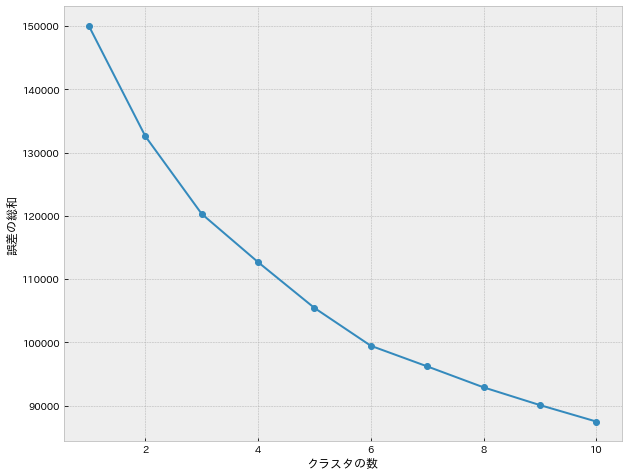

In [ ]:
# クラスタリング : エルボー法による最適なクラスタ数の計算  

from sklearn.cluster import KMeans

sse = []

for i  in range(1,11):                
    kmeans = KMeans(
        n_clusters=i,
        n_init=10,
        random_state=0
        )
    
    kmeans.fit(x_scaled)             
    sse.append(kmeans.inertia_)   

plt.plot(range(1,11), sse , marker='o')
plt.xlabel('クラスタの数')
plt.ylabel('誤差の総和')
plt.show()

In [ ]:
# クラスタリングの実行 : エルボー法で最適なクラスタ数を指定して実装してください。   
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(x_scaled)
cluster = kmeans.labels_

In [ ]:
# 実行してください  
df_clustering = df.copy() # df のデータをコピー

In [ ]:
# 変数名 `cluster` で df_clustering にクラスタリングの結果を追加
df_clustering['cluster'] = cluster

In [ ]:
# 変数 `cluster` 毎に groupby() でまとめる  
groups = df_clustering.groupby('cluster')

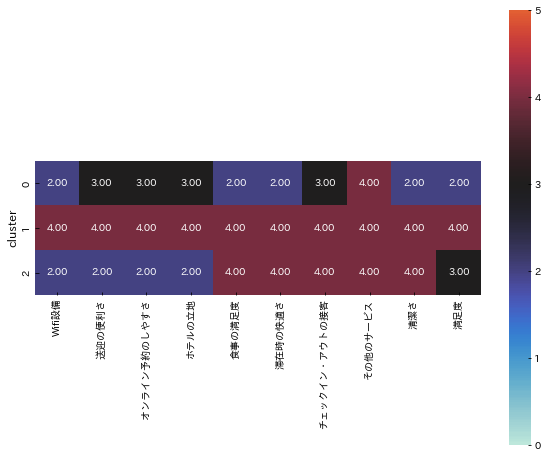

In [ ]:
# クラスタ毎の各項目の代表値を見る（中央値）: 変数`年齢`は省く
median = groups.median().drop('年齢', axis=1)

sns.heatmap(
    median,
    annot=True,
    square=True,
    vmin=0.0,
    vmax=5.0,
    center=3.0,
    fmt='.2f'
    );

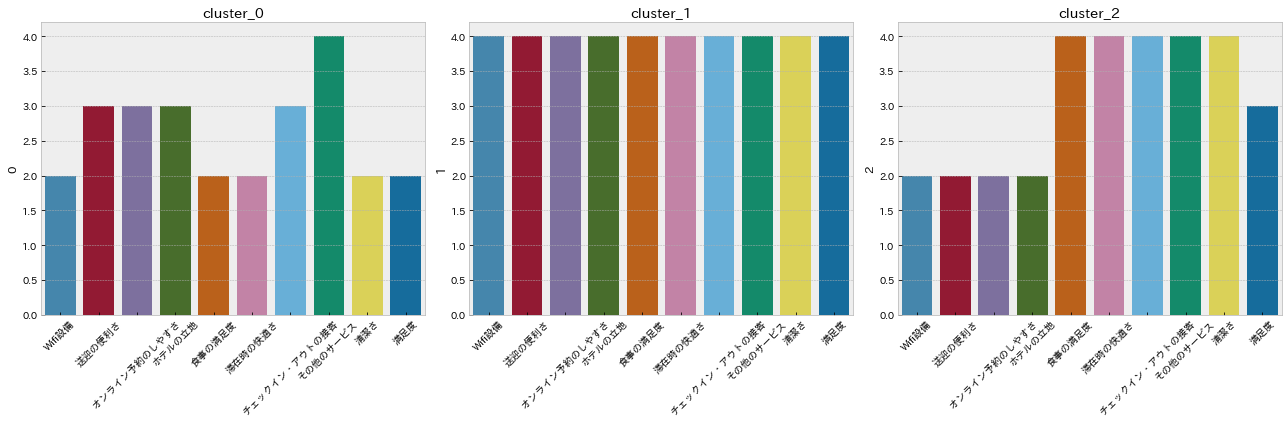

In [ ]:
# 実行してください  
num = kmeans.n_clusters

plt.figure(figsize=(18, 6))

for n in range(num):
    plt.subplot(1, 3, n+1)
    plt.title(f'cluster_{n}')
    sns.barplot(x=median.columns, y=median.loc[n])
    plt.xticks(rotation=45)
    plt.tight_layout()

< テストの正解選択肢や、読み取れたことをまとめてください >
1. クラスター1：全体の評価項目が相対的に低い低評価レビュークラスタ。満足度も最も低い。満足度が 2 番目に高いクラスタと比較すると、「送迎の便利さ」「オンライン予約のしやすさ」「ホテルの立地」について、評点が高いクラスタである。
2. クラスター2：他のクラスタと比較して全体的に各評点が高い傾向がある。また、満足度も高い。他クラスタと相対的に見て、満足度の高い高評価レビュークラスタ。
3. クラスター3：満足度が最も低いクラスタと比較すると、「食事の満足度」「滞在時の快適さ」「清潔さ」の評点が高い。2 番目に全体的な評価の良いクラスタだが、評価に偏りが目立つ。ホテル内のサービスに高評価のクラスタ。

### 主成分分析による可視化
主成分分析も併用して用い、クラスタ毎の傾向を可視化する。  


In [ ]:
# 主成分分析 : 実行してください 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# 主成分分析 : 実行してください 
df_numeric = df.select_dtypes(include='number')
x = df_numeric.drop(['年齢', '満足度'], axis=1)

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [ ]:
# 主成分分析 : 実行してください 
pca = PCA(n_components=3, random_state=0)
feature = pca.fit_transform(x_scaled)

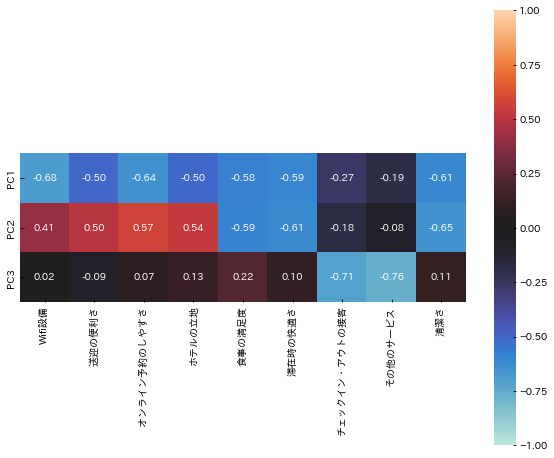

In [ ]:
# 主成分分析 : 実行してください 
cols = df_numeric.columns.drop(['年齢', '満足度'])

factor_loading = pca.components_ * np.c_[np.sqrt(pca.explained_variance_)]

df_factor_loading = pd.DataFrame(
    factor_loading,
    index=[f'PC{x+1}' for x in range(len(factor_loading))],
    columns=cols
)

sns.heatmap(df_factor_loading.head(3), vmax=1.0, center=0.0, vmin=-1.0, square=True, annot=True, fmt='.2f');

主成分はそれぞれ、以下のように定義できる。  

- 第一主成分 : 総合評価  
- 第二主成分 : ホテルの環境評価  
- 第三主成分 : 接客の評価  

クラスタと満足度がそれぞれのサンプル毎で判別ができるように、求めた第一主成分と第二主成分をそれぞれ、x 軸 y 軸として可視化する。  

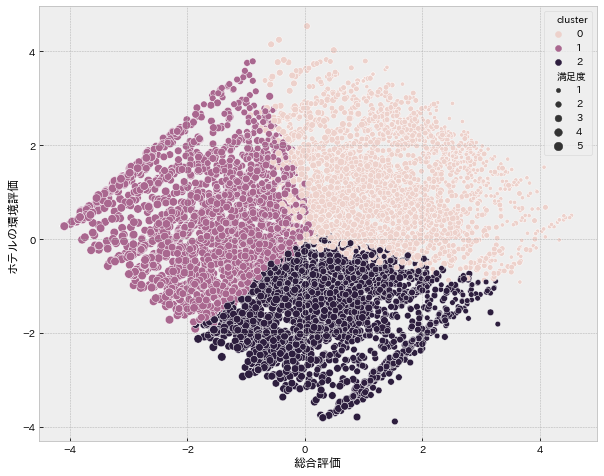

In [ ]:
# 主成分分析 : 実行してください
feature_df = pd.DataFrame(feature, columns=['総合評価', 'ホテルの環境評価', '接客の評価'])
new_data = pd.concat([df_clustering, feature_df], axis=1)

sns.scatterplot(x='総合評価', y='ホテルの環境評価', hue='cluster', size='満足度', data=new_data);

上記の様に、各クラスタは基準を持って、　3　つのグループに分割できることが分かる。特に第二主成分によって、クラスタ 1, 2 は分割可能に伺える。  
よって、大枠では、`Wifi 設備`、`送迎の便利さ`、`オンライン予約のしやすさ`、`ホテルの立地`の評点群、または、`食事の満足度`、`滞在時の快適さ`、`清潔さ`の評点群のどちらかへに評価が偏る傾向がある事がわかる。  


### クラスタの代表値の比較による要因の特定と施策の考案   
→ 該当する問題：**Q 5**   

ここまでで、大枠の傾向と、全体傾向としての項目の重要度を順位付けて判断することができた。  
先程、クラスタリングにより分けたクラスタ毎に傾向より詳しく読み取り、具体的な施策を考案するまでを分析する。  
基本的な方針として、各クラスタの特徴を踏まえた上で、各クラスタ毎でも共通する項目、逆に偏りのある項目、クラスタ内で目立つ方よりに注目し分析を進める。  

まずは各クラスタの相関分析からおこなう。  

In [ ]:
# 各クラスタのデータを取得してください 
df_cluster0 = groups.get_group(0)
df_cluster1 = groups.get_group(1)
df_cluster2 = groups.get_group(2)

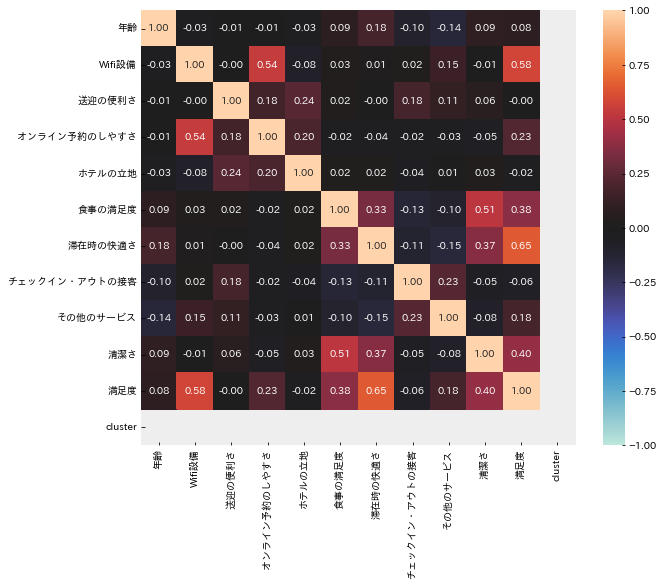

In [ ]:
# クラスタ 0 （df_cluster0）の相関
sns.heatmap(df_cluster0.corr(), vmax=1.0, center=0.0, vmin=-1.0, square=True, annot=True, fmt='.2f');

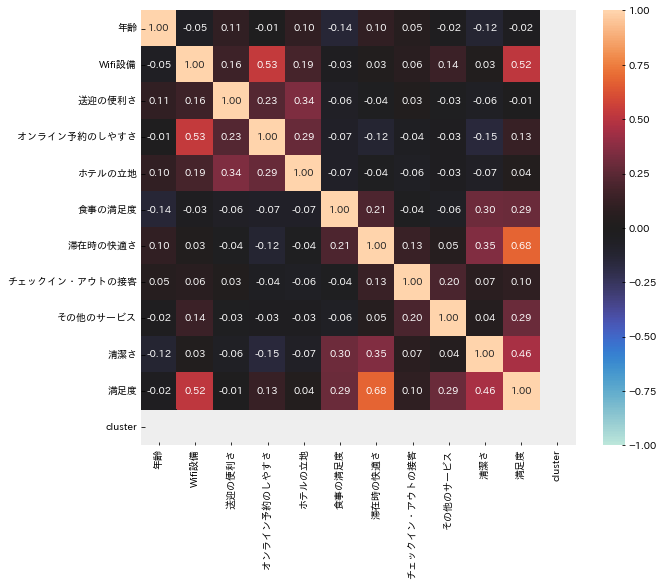

In [ ]:
# クラスタ 1 （df_cluster1）の相関
sns.heatmap(df_cluster1.corr(), vmax=1.0, center=0.0, vmin=-1.0, square=True, annot=True, fmt='.2f');

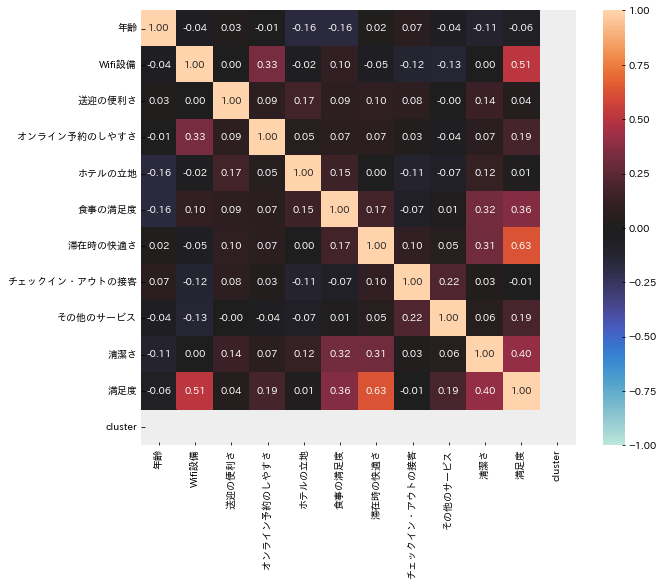

In [ ]:
# クラスタ 2 （df_cluster2）の相関
sns.heatmap(df_cluster2.corr(), vmax=1.0, center=0.0, vmin=-1.0, square=True, annot=True, fmt='.2f');

顧客の属性による評価の違いも考慮して、定性的に代表値の比較を行う。  
代表値には中央値を使用する。  

In [ ]:
# クラスタ 0 の満足度内訳 : 実行してください 
df_cluster0['満足度'].value_counts()

2    1687
3    1130
1     393
4      49
Name: 満足度, dtype: int64

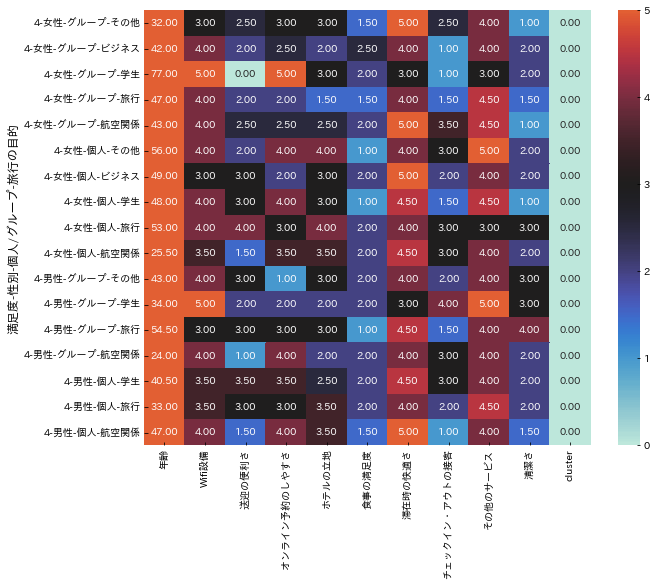

In [ ]:
#クラスタ 0 （cluster 0 ）内の満足度高評価サンプルの代表値（中央値）比較
# 「満足度が 4 または 5」という条件を追記してください。  
_df = df_cluster0.groupby(['満足度','性別', '個人/グループ', '旅行の目的']).median().query('満足度>=4')

sns.heatmap(_df, 
            vmin=0,
            vmax=5,
            center=3,
            annot=True,
            fmt='.2f');

In [ ]:
# クラスタ 1 の満足度内訳  : 実行してください 
df_cluster1['満足度'].value_counts()

4    2171
3     772
5     647
2      37
Name: 満足度, dtype: int64

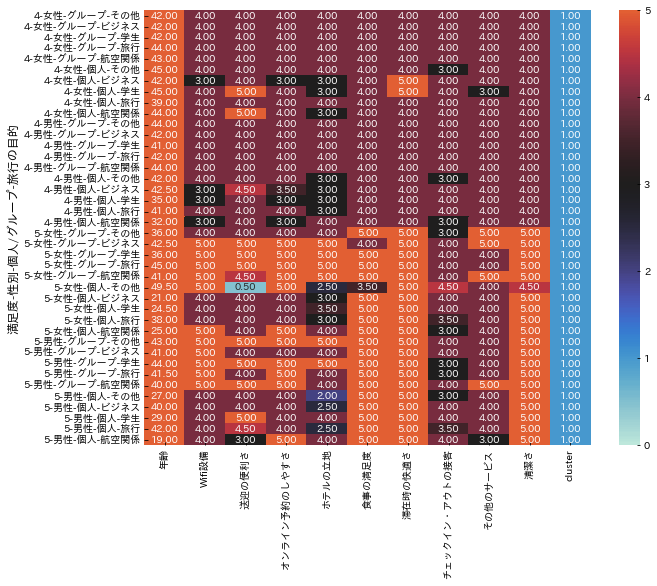

In [ ]:
#クラスタ 1 （cluster 1 ）内の満足度高評価サンプルの代表値（中央値）比較
# 「満足度が 4 または 5」という条件を追記してください。  
_df = df_cluster1.groupby(['満足度','性別', '個人/グループ', '旅行の目的']).median().query('満足度>=4')

sns.heatmap(_df, 
            vmin=0,
            vmax=5,
            center=3,
            annot=True,
            fmt='.2f');

In [ ]:
# クラスタ 2 の満足度内訳  : 実行してください 
df_cluster2['満足度'].value_counts()

3    1664
4    1129
2     252
5      69
Name: 満足度, dtype: int64

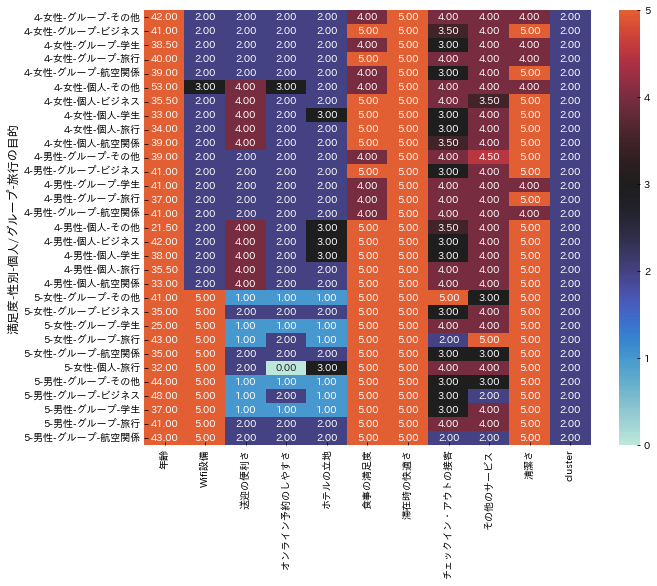

In [ ]:
#クラスタ 2 （cluster 2 ）内の満足度高評価サンプルの代表値（中央値）比較
# 「満足度が 4 または 5」という条件を追記してください。  
_df = df_cluster2.groupby(['満足度','性別', '個人/グループ', '旅行の目的']).median().query('満足度>=4')

sns.heatmap(_df, 
            vmin=0,
            vmax=5,
            center=3,
            annot=True,
            fmt='.2f');

各クラスタにおいて、満足度が高評価であるサンプルに共通しているのは、`Wifi 設備`、`滞在時の快適さ`の評点が高いことである。  
どの様なお客様に対しても共通して効果が大きいのは上記 2 つに対して改善策を講じることだと判断できる。  



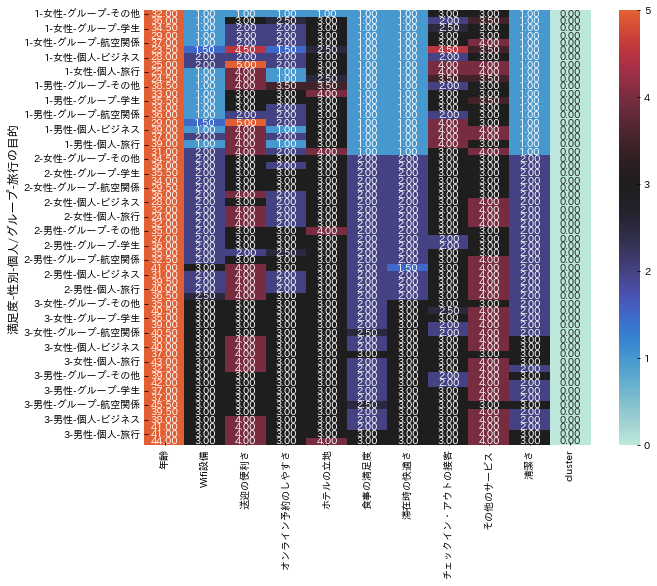

In [ ]:
#クラスタ 0 内の満足度低評価（満足度 1,2,3）サンプルの代表値（中央値）比較  
# 満足度 4,5 の場合の実装を見本に実装してみてください。  
_df = df_cluster0.groupby(['満足度','性別', '個人/グループ', '旅行の目的']).median().query('満足度<=3')

sns.heatmap(_df, 
            vmin=0,
            vmax=5,
            center=3,
            annot=True,
            fmt='.2f');

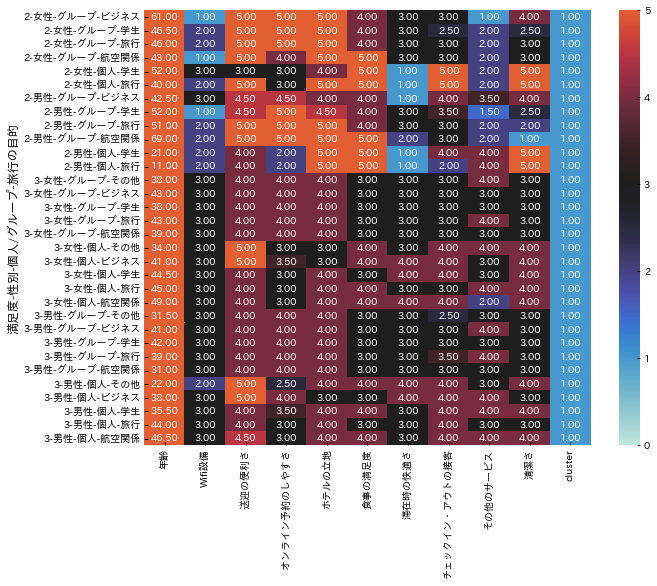

In [ ]:
#クラスタ 1 内の満足度低評価（満足度 1,2,3）サンプルの代表値（中央値）比較  
# 満足度 4,5 の場合の実装を見本に実装してみてください。  
_df = df_cluster1.groupby(['満足度','性別', '個人/グループ', '旅行の目的']).median().query('満足度<=3')

sns.heatmap(_df, 
            vmin=0,
            vmax=5,
            center=3,
            annot=True,
            fmt='.2f');

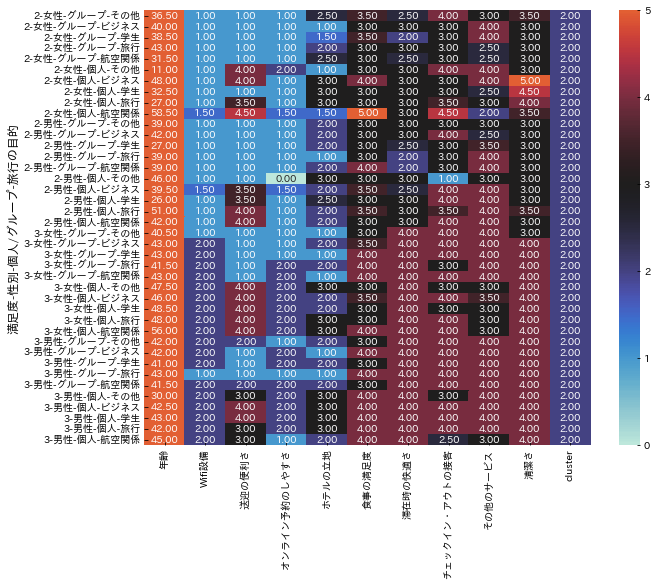

In [ ]:
#クラスタ 2 内の満足度低評価（満足度 1,2,3）サンプルの代表値（中央値）比較  
# 満足度 4,5 の場合の実装を見本に実装してみてください。  
_df = df_cluster2.groupby(['満足度','性別', '個人/グループ', '旅行の目的']).median().query('満足度<=3')

sns.heatmap(_df, 
            vmin=0,
            vmax=5,
            center=3,
            annot=True,
            fmt='.2f');

上記それぞれの結果を踏まえ各要因を以下の 4 つに分類する。  

1. 優先度高く改善を行う項目
→ Wifi設備、滞在時の快適さ<br>
それぞれは、全てのクラスタについて共通して、満足度との正の相関が見れる項目。
よって、クラスタによらず満足度と関連性の強い重要な項目と判断する。
中央値を比較しても同様に、この 2 つの項目への評価が高いと満足度への評点も高くなる傾向が読み取れる。Wifi設備については、クラスタによっては個人とグループでは、個人のサンプルの方が低い評点を付けている（中央値比較）傾向を読み取れる。
滞在時の快適さも同様に重要な項目として扱える。
ただし、具体的な施策を考えるには滞在時の快適さの要因は何であるかの分析を行う必要がある。

2. 第二優先項目として改善を行う項目
→ 食事の満足度、清潔さ<br>
1とは異なり、クラスタ間で共通ではないが、各クラスタ毎ではこれらの評点が高いと満足度も高くなる傾向が読み取れる項目。
また、実際の業務をイメージした場合に、データにはない要因を考慮する必要がある項目。それぞれは、`個人/グループ`、`性別`、`旅行の目的`によってはさほど傾向に差がなく、クラスタ毎では傾向に差があることも読み取れる。
よって、第二優先として重要な項目と判断する。ただし、追加でデータを収集して、分析が必要である。
（例えば、評点が高い宿泊者と、低い宿泊者で提供した食事メニューの違いはないか、清掃担当者は誰かなど。）

3. 現在のサービス品質の維持を目指す項目
→ 送迎の便利さ、チェックイン・アウトの接客、その他のサービス<br>
特定のクラスタの特定の満足度の評点のサンプルによっては低いパターンが存在するが、基本傾向として満足度によらず、各項目への評点の値のばらつきは大きい。
また、中央値比較では 3 ~ 4 の評点が多いため、現在のサービス品質を落とさないことを優先に考える項目と判断する。

4. 優先度を下げるまたは考慮しない項目
→ ホテルの立地、オンライン予約のしやすさ<br>
これらは、主にアンコントローラブルな項目（または、その要素が強い項目）と考える。
ホテルの立地は前提として、変更が難しい。
オンライン予約のしやすさも予約時の環境などを考慮する必要があるため、ホテル側でのコントロール可能な範囲が少ない。
よって、これらは優先順位を下げる、または考慮しない項目と判断する。

## まとめパート  

本分析では、hotel_reviews.csv を使用して、顧客の満足度に寄与している要因を見つけ出し、満足度向上のための施策を考え、リピート顧客を増やすことを目的として分析を行った。  

データ分析の結論として以下の実施を提案する。  

- 個人用客室の Wifi 設備の確認と必要に応じて通信設備の見直し  
- 滞在時の快適さに関する追加分析  
- 食事の満足度と清潔さに関する追加分析  


---
---

#### ipynb を PDF に変換する方法  
**ファイル > 印刷 > PDF で保存**と実行する  


